In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
import geopandas as gpd

%matplotlib inline

df = pd.read_csv('/N/project/COVIDcampus/population/2020-06/Midwest Usa Coronavirus Disease Prevention Map May 09 2020 Id  Facebook Population (Tile Level)_2020-06-30 1600.csv', sep=',',escapechar='\\', na_values='N')
#df = pd.read_csv('/N/project/rcsc/raw_data/mag-2020-05-29/2020-06-08/CORD-MAG-institutionList.csv', sep=',',escapechar='\\')
points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
#points = points.reset_index(drop=True)
points

lat        lon      quadkey country        date_time  n_baseline  \
0      40.547192 -82.836914  32001010221      US  2020-06-30 1600  285.525531   
1      41.079343 -95.317383  21333222231      US  2020-06-30 1600   29.276451   
2      39.334289 -94.262695  23111023111      US  2020-06-30 1600  638.364426   
3      40.880286 -88.989258  32000001013      US  2020-06-30 1600   62.088436   
4      29.954927 -85.561523  32020132030     NaN  2020-06-30 1600   31.055780   
...          ...        ...          ...     ...              ...         ...   
50677  37.125278 -93.999023  23111232010      US  2020-06-30 1600   37.913364   
50678  41.079343 -88.461914  30222232221      US  2020-06-30 1600  186.599448   
50679  41.409767 -95.053711  21333222112      US  2020-06-30 1600  166.791110   
50680  40.813801 -83.803711  32001000130      US  2020-06-30 1600   91.012208   
50681  32.138401 -94.877930  23113223202      US  2020-06-30 1600  206.850112   

         n_crisis  n_difference  density_baseline  density_crisis  \
0      282.921843     -2.603688          0.000025        0.000026   
1       31.908256      2.631805          0.000003        0.000003   
2      624.798694    -13.565732          0.000056        0.000057   
3       55.791916     -6.296520          0.000005        0.000005   
4       29.558679     -1.497101          0.000003        0.000003   
...           ...           ...               ...             ...   
50677   37.012395     -0.900969          0.000003        0.000003   
50678  177.081484     -9.517963          0.000016        0.000016   
50679  181.926731     15.135621          0.000015        0.000017   
50680   81.315469     -9.696739          0.000008        0.000007   
50681  204.045261     -2.804851          0.000018        0.000019   

       percent_change  clipped_z_score          ds  \
0           -0.908711        -0.163176  2020-10-09   
1            8.692579         1.662062  2020-10-09   
2           -2.121753        -1.140607  2020-10-09   
3           -9.980466        -1.388820  2020-10-09   
4           -4.670301        -0.492726  2020-10-09   
...               ...              ...         ...   
50677       -2.315320        -0.243235  2020-10-09   
50678       -5.073556        -0.914776  2020-10-09   
50679        9.020514         2.571736  2020-10-09   
50680      -10.538536        -4.000000  2020-10-09   
50681       -1.349459        -0.397947  2020-10-09   

                                     geometry  
0      POINT (-82.8369140625 40.547191909586)  
1      POINT (-95.3173828125 41.079342801851)  
2      POINT (-94.2626953125 39.334289167655)  
3      POINT (-88.9892578125 40.880286466099)  
4      POINT (-85.5615234375 29.954927258811)  
...                                       ...  
50677  POINT (-93.9990234375 37.125278174904)  
50678  POINT (-88.4619140625 41.079342801851)  
50679  POINT (-95.0537109375 41.409767471687)  
50680  POINT (-83.8037109375 40.813800893966)  
50681   POINT (-94.8779296875 32.13840110541)  

[50682 rows x 14 columns]

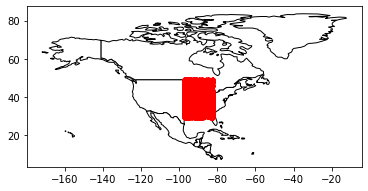

In [28]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
SA = world[world.continent == 'North America']
# We restrict to South America.
ax = SA.plot(color='white', edgecolor='black')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [100, 50]
points.plot(ax=ax, color='red', markersize = 5)
plt.show()

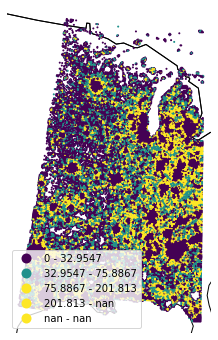

In [29]:
import geoplot as gplt
import geoplot.crs as gcrs

ax = gplt.polyplot(SA, projection=gcrs.AlbersEqualArea())
image = gplt.pointplot(
  points, projection=gcrs.AlbersEqualArea(), hue='n_baseline', scale='n_baseline', ax=ax, legend=True
)

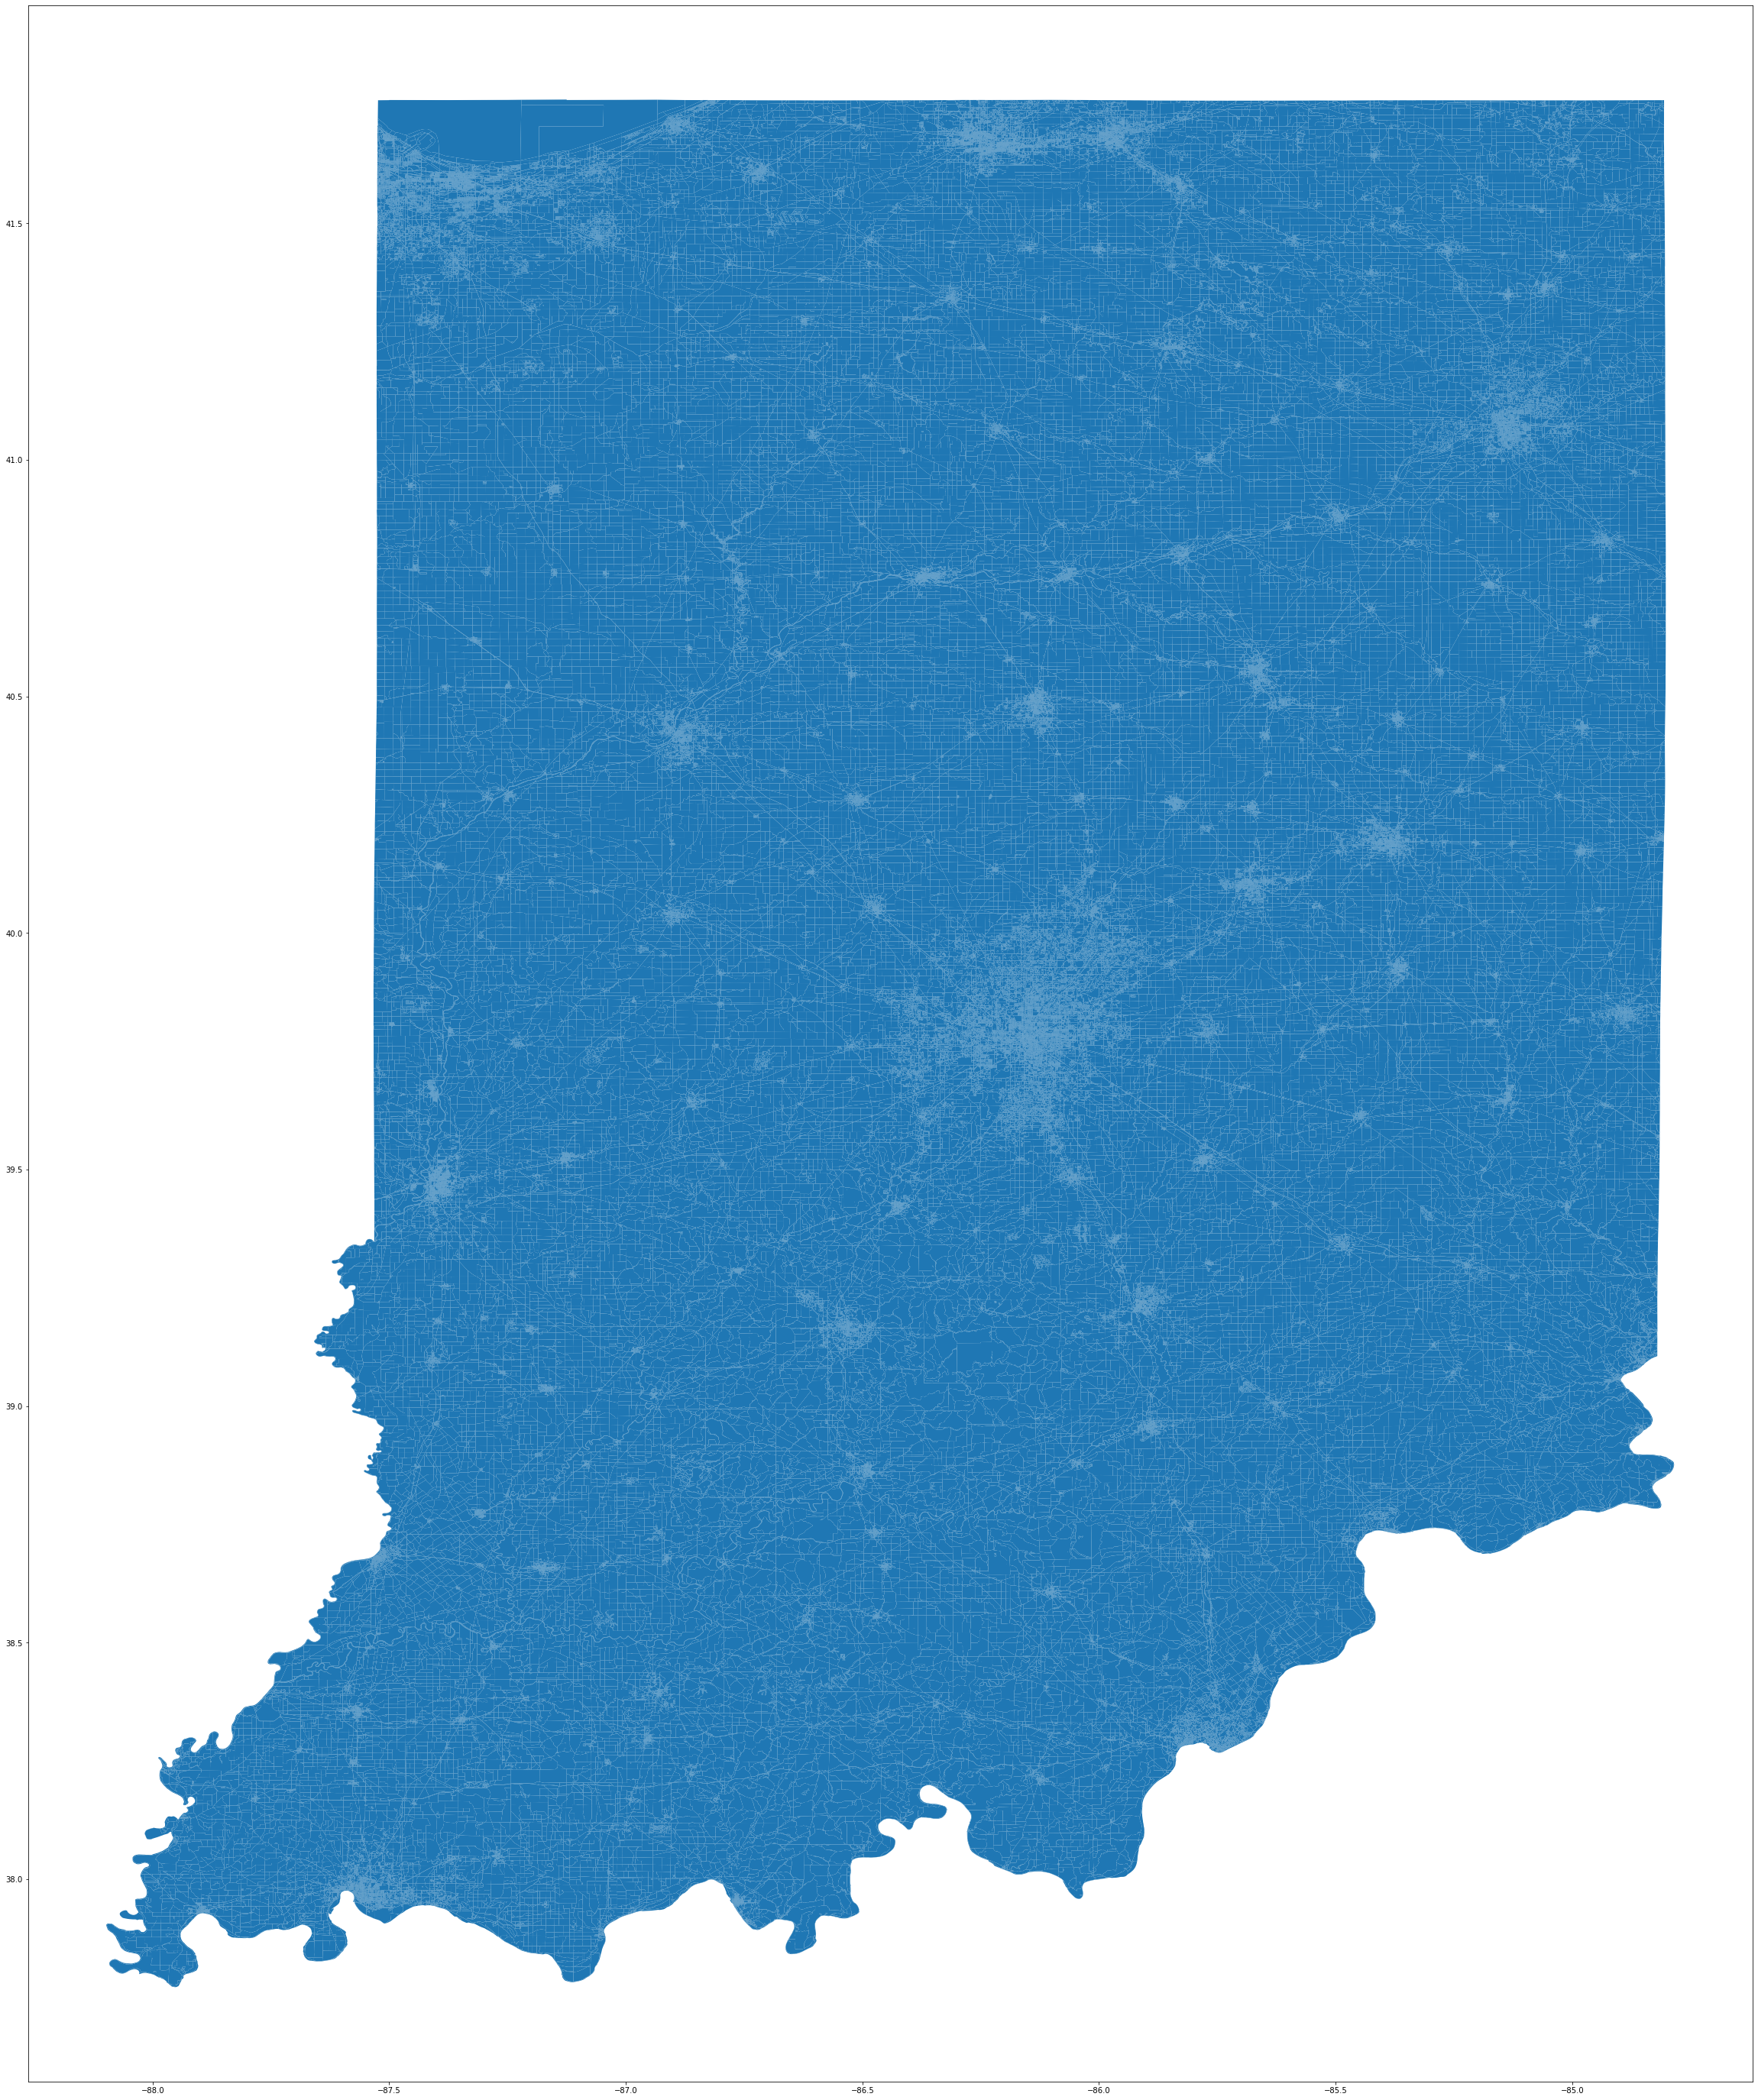

In [34]:
shape = gpd.read_file("/N/project/COVIDcampus/yan30/COVID-campus/shapefiles/tl_2010_18_tabblock10/tl_2010_18_tabblock10.shp")
shape.plot()                  

In [43]:
shape['INTPTLON10'] = shape['INTPTLON10'].astype(float)
shape['INTPTLAT10'] = shape['INTPTLAT10'].astype(float)
shape

STATEFP10 COUNTYFP10 TRACTCE10 BLOCKCE10          GEOID10      NAME10  \
0             18        001    030700      5005  180010307005005  Block 5005   
1             18        001    030700      5050  180010307005050  Block 5050   
2             18        001    030700      5073  180010307005073  Block 5073   
3             18        001    030700      5041  180010307005041  Block 5041   
4             18        001    030700      5010  180010307005010  Block 5010   
...          ...        ...       ...       ...              ...         ...   
267066        18        183    050200      5000  181830502005000  Block 5000   
267067        18        183    050200      3002  181830502003002  Block 3002   
267068        18        183    050200      1032  181830502001032  Block 1032   
267069        18        183    050200      4002  181830502004002  Block 4002   
267070        18        183    050200      5006  181830502005006  Block 5006   

       MTFCC10  UR10 UACE10 FUNCSTAT10  ALAND10  AWATER10  INTPTLAT10  \
0        G5040  None   None          S  3245059         0   40.652014   
1        G5040  None   None          S  1311284         0   40.607992   
2        G5040  None   None          S  1306313         0   40.593609   
3        G5040  None   None          S     4148         0   40.630066   
4        G5040  None   None          S     1044         0   40.649684   
...        ...   ...    ...        ...      ...       ...         ...   
267066   G5040  None   None          S  2303382         0   41.255329   
267067   G5040  None   None          S   771401         0   41.261723   
267068   G5040  None   None          S    21093         0   41.265582   
267069   G5040  None   None          S     1240         0   41.258733   
267070   G5040  None   None          S  1615936         0   41.260470   

        INTPTLON10                                           geometry  
0       -84.842123  POLYGON ((-84.830484 40.655618, -84.830479 40....  
1       -84.854165  POLYGON ((-84.858943 40.600662, -84.8589719999...  
2       -84.844484  POLYGON ((-84.847962 40.600817, -84.845837 40....  
3       -84.817376  POLYGON ((-84.81798999999999 40.630297, -84.81...  
4       -84.868499  POLYGON ((-84.868776 40.649591, -84.8687769999...  
...            ...                                                ...  
267066  -85.435178  POLYGON ((-85.437741 41.249528, -85.4378699999...  
267067  -85.524700  POLYGON ((-85.529606 41.257796, -85.5295989999...  
267068  -85.536080  POLYGON ((-85.53809199999999 41.265852, -85.53...  
267069  -85.471892  POLYGON ((-85.472025 41.258367, -85.472031 41....  
267070  -85.452056  POLYGON ((-85.462867 41.25780899999999, -85.46...  

[267071 rows x 15 columns]

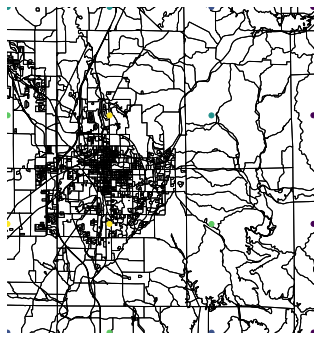

In [57]:
Bloomington = points[(points['lat']>=39) & (points['lat']<=39.3) & (points['lon']<=-86.3) & (points['lon']>=-86.7)]  
ShapeBloomington = shape[(shape['INTPTLAT10']>=39) & (shape['INTPTLAT10']<=39.3) & (shape['INTPTLON10']<=-86.3) & (shape['INTPTLON10']>=-86.7)]  
ax = gplt.polyplot(ShapeBloomington, projection=gcrs.AlbersEqualArea())
gplt.pointplot(
  Bloomington, projection=gcrs.AlbersEqualArea(), hue='n_baseline', ax=ax, legend=False
)

In [56]:
len(Bloomington)

16

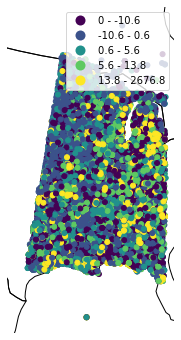

In [80]:
df = pd.read_csv('/N/project/COVIDcampus/movement/2020-06/Midwest Usa Coronavirus Disease Prevention Map May 09 2020 Id  Movement between Tiles__2020-06-02 0000.csv', sep=',',escapechar='\\', na_values='N')
#df = pd.read_csv('/N/project/rcsc/raw_data/mag-2020-05-29/2020-06-08/CORD-MAG-institutionList.csv', sep=',',escapechar='\\')
df['lon'] = df['start_lon']#+df['end_lon'])/2
df['lat'] = df['start_lat']#+df['end_lat'])/2
points2 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
#points = points.reset_index(drop=True)
ax = gplt.polyplot(SA, projection=gcrs.AlbersEqualArea())
image = gplt.pointplot(
  points2, projection=gcrs.AlbersEqualArea(), hue='n_difference', ax=ax, legend=True
)

In [81]:
points2

geometry        date_time  \
0        POINT (-86.927015522869 45.381365727613)  2020-06-02 0000   
1      POINT (-85.35005795981699 36.728029648449)  2020-06-02 0000   
2      POINT (-86.19826771520999 34.246919605177)  2020-06-02 0000   
3      POINT (-89.77908435814899 42.901130411706)  2020-06-02 0000   
4        POINT (-97.393747667068 31.434091290079)  2020-06-02 0000   
...                                           ...              ...   
32392    POINT (-92.800513109267 37.389659145324)  2020-06-02 0000   
32393     POINT (-96.44350054351 32.049935489216)  2020-06-02 0000   
32394     POINT (-87.948170936088 36.00257172999)  2020-06-02 0000   
32395  POINT (-97.69206096758199 30.240189478618)  2020-06-02 0000   
32396  POINT (-88.359626580304 43.23750939485799)  2020-06-02 0000   

       start_polygon_id  start_polygon_name  end_polygon_id  \
0               1428115          Washington         1428115   
1               1104937  Kettle-Peytonsburg         1104937   
2               1068729    Albertville-Boaz         1068563   
3               1428031               Perry         1428031   
4               1419593            McGregor         1419595   
...                 ...                 ...             ...   
32392           1202389             Niangua         1202389   
32393           1419673           Corsicana         1419673   
32394           1096956    New Johnsonville         1096872   
32395           1419878              Austin         1418940   
32396           1429430                Erin         1428740   

         end_polygon_name  length_km  tile_size country   level  ...  \
0              Washington   0.000000         11      US  LEVEL4  ...   
1      Kettle-Peytonsburg   0.000000         11      US  LEVEL4  ...   
2            Collinsville  32.319011         11      US  LEVEL4  ...   
3                   Perry   0.000000         11      US  LEVEL4  ...   
4            Moody-Lorena  23.605691         11      US  LEVEL4  ...   
...                   ...        ...        ...     ...     ...  ...   
32392             Niangua   0.000000         11      US  LEVEL4  ...   
32393           Corsicana  16.571134         11      US  LEVEL4  ...   
32394             Waverly  22.354147         11      US  LEVEL4  ...   
32395             Bastrop  33.779007         11      US  LEVEL4  ...   
32396          West Allis  40.344811         11      US  LEVEL4  ...   

       is_statistically_significant   z_score  start_lat  start_lon  \
0                                 0  4.000000  45.381366 -86.927016   
1                                 0 -4.000000  36.728030 -85.350058   
2                                 0  4.000000  34.246920 -86.198268   
3                                 0 -2.153976  42.901130 -89.779084   
4                                 0  0.524661  31.434091 -97.393748   
...                             ...       ...        ...        ...   
32392                             0 -2.721237  37.389659 -92.800513   
32393                             0  0.000000  32.049935 -96.443501   
32394                             0  0.392232  36.002572 -87.948171   
32395                             0  1.298287  30.240189 -97.692061   
32396                             0  1.566995  43.237509 -88.359627   

         end_lat    end_lon  start_quadkey  end_quadkey        lon        lat  
0      45.381366 -86.927016     3022032203   3022032203 -86.927016  45.381366  
1      36.728030 -85.350058     3200033230   3200033230 -85.350058  36.728030  
2      34.266613 -85.877334     3200230101   3200230111 -86.198268  34.246920  
3      42.901130 -89.779084     3022220003   3022220003 -89.779084  42.901130  
4      31.354477 -97.285833     2313010123   2313010310 -97.393748  31.434091  
...          ...        ...            ...          ...        ...        ...  
32392  37.389659 -92.800513     2311132020   2311132020 -92.800513  37.389659  
32393  32.049935 -96.443501     2311233232   2311233233 -96.443501  32.049935  
32394

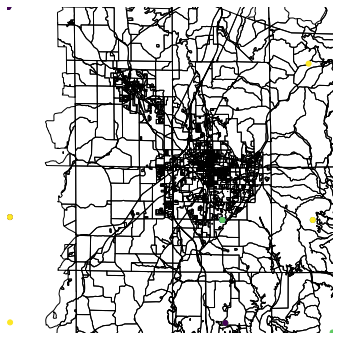

In [87]:
Bloomington2 = points2[(points2['lat']>=39) & (points2['lat']<=39.3) & (points2['lon']<=-86.3) & (points2['lon']>=-86.8)]  
ax = gplt.polyplot(ShapeBloomington, projection=gcrs.AlbersEqualArea())
gplt.pointplot(
  Bloomington2, projection=gcrs.AlbersEqualArea(), hue='n_baseline', ax=ax, legend=False
)

In [85]:
len(Bloomington2)

59

In [7]:
from math import radians, cos, sin, asin, sqrt

def haversine(point1, point2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lng1 = point1[0]
    lat1 = point1[1]
    lng2 = point2[0]
    lat2 = point2[1]
    lng1, lat1, lng2, lat2 = map(radians, [lng1, lat1, lng2, lat2])

    # haversine formula 
    dlng = lng2 - lng1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [825]:
from scipy.sparse import coo_matrix
# generator version for smaller memory usage. Use the Cython for a faster implementation
N, thresh = 4700, 1000
def geoKernel(N, thresh):
    # efficient sparse geo-kernel generator with additional filter on degree differences
    count = 0
    for i in range(N):
        point1 = points[['lng','lat']].iloc[i].to_numpy()
        # only calculate between points that is within 20 degrees
        subset = points.loc[(points['lat'] >= (point1[1]-10))&(points['lat'] <= (point1[1]+10))&(points['lng'] >= (point1[0]-10)) & (points['lng'] <= (point1[0]+10))]
        for j in range(len(subset)):
            # call the Haversine formula
            point2 = subset[['lng','lat']].iloc[j].to_numpy()
            value = haversine(point1,point2)
            ilocj = points.index.get_loc(subset.iloc[j].name)
            if (value < thresh):
                yield count, (i, ilocj, value)
                count += 1
                
dt = np.dtype([('i',int), ('j',int), ('data',float)])
X = np.empty((N*4700,), dtype=dt)
for count, tup in geoKernel(N,1000):
    X[count] = tup
    #print(count)

print(X.shape)
print(X['i'])
print(X['j'])
print(X['data'])

In [8]:
%load_ext Cython

In [9]:
%%cython --annotate

cimport numpy as np
import numpy as np
cimport cython
ctypedef np.float64_t DTYPE_t
from math import radians, cos, sin, asin, sqrt

def haversine(lng1, lat1, lng2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lng1, lat1, lng2, lat2 = map(radians, [lng1, lat1, lng2, lat2])

    # haversine formula 
    dlng = lng2 - lng1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

def geoKernel_cython(float[:,::1] data, int threshold):
    
    N = len(data)
    X = np.empty((N,N), dtype=float)
    for i in range(N):
        for j in range(i, N):
            # call the Haversine formula
            X[i][j] = haversine(data[i][0],data[i][1],data[j][0],data[j][1])
    return X

In [10]:
data = points[['lng','lat']].to_numpy()
data = data.copy(order='C').astype('float32') 
data.flags
#haversine(data[0], data[20])
#%load_ext Cython

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [12]:
#def f():
N, thresh = 4700, 1000
X = geoKernel_cython(data, thresh)

In [74]:
import cProfile 
cProfile.run('f()') 

         5 function calls in 15.531 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   15.531   15.531 <ipython-input-73-322f11a66e1b>:1(f)
        1    0.001    0.001   15.531   15.531 <string>:1(<module>)
        1   15.530   15.530   15.530   15.530 {_cython_magic_9e7454d2281660765770822fa8770ab3.geoKernel_cython}
        1    0.000    0.000   15.531   15.531 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




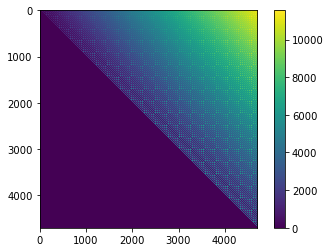

In [13]:
plt.imshow(X)
plt.colorbar()
#plt.clim(0, 0.1);
plt.show()

In [14]:
from scipy.sparse import coo_matrix

Xs = X + X.T - np.diag(X.diagonal())

fullGeo = coo_matrix(Xs, shape=(N,N))
print(fullGeo.shape)

fullGeo.data = np.exp(-fullGeo.data**2 / fullGeo.data.std()**2)
#fullGeo.setdiag(1)
print(fullGeo.A)

(4700, 4700)
[[0.00000000e+00 9.99879414e-01 9.99517797e-01 ... 1.39208643e-10
  1.28049836e-10 1.17614478e-10]
 [9.99879414e-01 0.00000000e+00 9.99879414e-01 ... 1.51115825e-10
  1.39208643e-10 1.28049836e-10]
 [9.99517797e-01 9.99879414e-01 0.00000000e+00 ... 1.63794089e-10
  1.51115825e-10 1.39208643e-10]
 ...
 [1.39208643e-10 1.51115825e-10 1.63794089e-10 ... 0.00000000e+00
  9.97079359e-01 9.88368677e-01]
 [1.28049836e-10 1.39208643e-10 1.51115825e-10 ... 9.97079359e-01
  0.00000000e+00 9.97079359e-01]
 [1.17614478e-10 1.28049836e-10 1.39208643e-10 ... 9.88368677e-01
  9.97079359e-01 0.00000000e+00]]


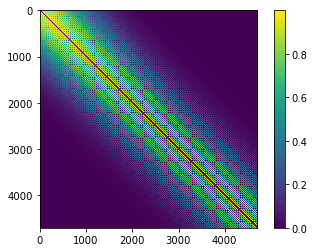

In [15]:
plt.imshow(fullGeo.A)
plt.colorbar()
#plt.clim(0, 0.001);
plt.show()

/N/u/yan30/Karst/.conda/envs/geoEnv/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([13.38774362,  2.11851874,  1.42411797,  1.09651851,  0.90065331,
         0.78707177,  0.70463053,  0.67942701,  0.57171977,  0.54245152,
         0.52460311,  0.48803683,  0.46782185,  0.44971532,  0.3952816 ,
         0.4032263 ,  0.40068313,  0.38927145,  0.39415402,  0.37518889,
         0.3723414 ,  0.32561601,  0.34404859,  0.34599129,  0.3552103 ,
         0.34364646,  0.35598194,  0.34545059,  0.35183027,  0.36266593]),
 array([1.17614478e-10, 3.33293139e-02, 6.66586277e-02, 9.99879415e-02,
        1.33317255e-01, 1.66646569e-01, 1.99975883e-01, 2.33305197e-01,
        2.66634510e-01, 2.99963824e-01, 3.33293138e-01, 3.66622452e-01,
        3.99951765e-01, 4.33281079e-01, 4.66610393e-01, 4.99939707e-01,
        5.33269021e-01, 5.66598334e-01, 5.99927648e-01, 6.33256962e-01,
        6.66586276e-01, 6.99915590e-01, 7.33244903e-01, 7.66574217e-01,
        7.99903531e-01, 8.33232845e-01, 8.66562158e-01, 8.99891472e-01,
        9.33220786e-01, 9.66550100e-01, 9.99879414e-01])

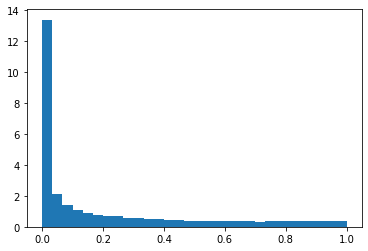

In [16]:
x = np.random.normal(size = 1000)
plt.hist(fullGeo.data, normed=True, bins=30)

/N/u/yan30/Karst/.conda/envs/geoEnv/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


(array([1.59414894, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.175     , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.05      , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.99734043, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.68351064]),
 array([0.        , 0.13333333, 0.26666667, 0.4       , 0.53333333,
        0.66666667, 0.8       , 0.93333333, 1.06666667, 1.2       ,
        1.33333333, 1.46666667, 1.6       , 1.73333333, 1.86666667,
        2.        , 2.13333333, 2.26666667, 2.4       , 2.53333333,
        2.66666667, 2.8       , 2.93333333, 3.06666667, 3.2       ,
        3.33333333, 3.46666667, 3.6       , 3.73333333, 3.86666667,
        4.        ]),
 <a list of 30 Patch objects>)

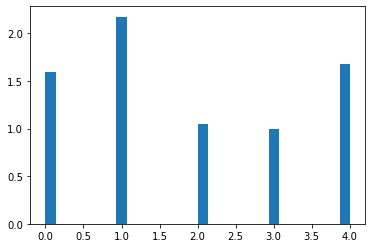

In [18]:
from sklearn.cluster import spectral_clustering

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(fullGeo, n_clusters=5, eigen_solver='arpack')
x = np.random.normal(size = 1000)
plt.hist(labels, normed=True, bins=30)

/N/u/yan30/Karst/.conda/envs/geoEnv/lib/python3.7/site-packages/geoplot/geoplot.py:231: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  f'Please specify "legend_var" explicitly when both "hue" and "scale" are '


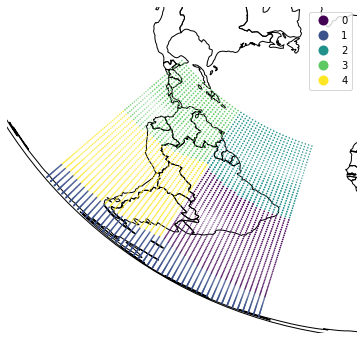

In [19]:
points['labels'] = list(map(str,(labels)))
ax = gplt.polyplot(world, projection=gcrs.AlbersEqualArea())

gplt.pointplot(
  points, projection=gcrs.AlbersEqualArea(), hue='labels', scale='meanV', limits=(1, 0.1), ax=ax, legend=True
)

(4700, 4700)


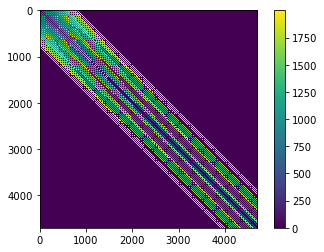

In [20]:
X0 = np.copy(X)
X0[X0>2000] = 0
X0s = X0 + X0.T - np.diag(X0.diagonal())

sparseGeo = coo_matrix(X0s, shape=(N,N))
print(sparseGeo.shape)

#sparseGeo.data = np.exp(-sparseGeo.data**2/sparseGeo.data.std()**2*0.1)
#sparseGeo.setdiag(1)
plt.imshow(sparseGeo.A)
plt.colorbar()
#plt.clim(0, 0.001);
plt.show()

/N/u/yan30/Karst/.conda/envs/geoEnv/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([1.47170049e-05, 1.14867795e-04, 1.23748614e-04, 1.92801200e-04,
        2.26782987e-04, 2.22541974e-04, 3.47272233e-04, 2.65197514e-04,
        4.34247508e-04, 3.97995667e-04, 4.05626423e-04, 4.97878039e-04,
        4.42146682e-04, 5.64016367e-04, 5.68364747e-04, 5.33370639e-04,
        6.57763458e-04, 5.07863209e-04, 7.11960995e-04, 6.50976303e-04,
        6.86392212e-04, 7.10457851e-04, 6.25008727e-04, 7.97287413e-04,
        6.93892593e-04, 7.64655388e-04, 7.90837699e-04, 7.23825094e-04,
        8.40840238e-04, 6.88608582e-04]),
 array([  26.52073349,   92.30178911,  158.08284473,  223.86390035,
         289.64495598,  355.4260116 ,  421.20706722,  486.98812284,
         552.76917846,  618.55023408,  684.3312897 ,  750.11234532,
         815.89340094,  881.67445657,  947.45551219, 1013.23656781,
        1079.01762343, 1144.79867905, 1210.57973467, 1276.36079029,
        1342.14184591, 1407.92290153, 1473.70395716, 1539.48501278,
        1605.2660684 , 1671.04712402, 1736.828

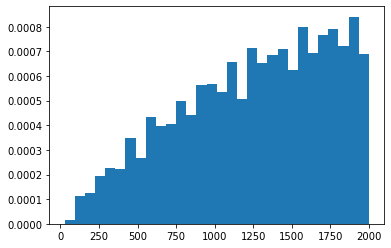

In [21]:
x = np.random.normal(size = 1000)
plt.hist(sparseGeo.data, normed=True, bins=30)

In [102]:
sparseGeo.data.size/fullGeo.data.size

0.17950700239525838

In [103]:
len(sparseGeo.col)/len(fullGeo.col)

0.17950700239525838

In [22]:
#from scipy.sparse import csr_matrix
import scipy as sp
# efficient sparse geo-kernel hadamard-product with input data
def geoKernelProd(data, geoKernel, smoothness):
    # creating masks for input data given the geo-kernel
    value_i = data[geoKernel.row]
    value_j = data[geoKernel.col]
    # only calculate between points that is non-zero in geo-kernel
    Xd = np.subtract(value_i,value_j)
    Xd = np.exp(-Xd**2 / Xd.std()**2/smoothness**2).reshape(len(value_i),)
    geoSmooth = geoKernel.copy()
    geoSmooth.data = np.exp(-geoKernel.data**2/geoKernel.data.std()**2)
    #geoSmooth.setdiag(1)
    Xd = np.multiply(Xd,geoSmooth.data)
    C = coo_matrix((Xd, (geoKernel.row, geoKernel.col)), shape=(len(data),len(data)))
    return C

(4700, 4700)


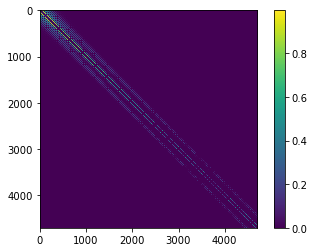

In [23]:
graph2 = geoKernelProd(points[['meanV']].to_numpy(),sparseGeo,1)

#graph2.data = np.exp(-graph2.data / graph2.data.std())
print(graph2.shape)
plt.imshow(graph2.A)
#plt.imshow(np.log(graph2.A))
plt.colorbar()
#plt.clim(0, 0.1);
plt.show()

In [24]:
sparseGeo.data

array([ 26.52073349,  53.03842615,  79.55003737, ..., 391.825761  ,
       261.22020566, 130.61101203])

/N/u/yan30/Karst/.conda/envs/geoEnv/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([0.58794326, 0.        , 0.        , 0.27304965, 0.        ,
        0.        , 0.15744681, 0.        , 0.        , 0.        ,
        0.45248227, 0.        , 0.        , 0.06879433, 0.        ,
        0.        , 0.14397163, 0.        , 0.        , 0.        ,
        0.26737589, 0.        , 0.        , 0.74397163, 0.        ,
        0.        , 0.26028369, 0.        , 0.        , 0.37801418]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
        3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. , 6.3, 6.6, 6.9, 7.2, 7.5,
        7.8, 8.1, 8.4, 8.7, 9. ]),
 <a list of 30 Patch objects>)

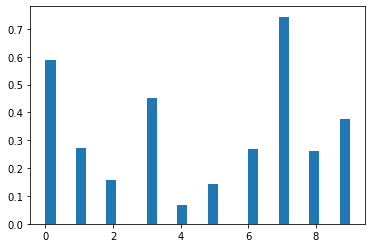

In [25]:
labels2 = spectral_clustering(graph2, n_clusters=10, eigen_solver='arpack')
x = np.random.normal(size = 1000)
plt.hist(labels2, normed=True, bins=30)

/N/u/yan30/Karst/.conda/envs/geoEnv/lib/python3.7/site-packages/geoplot/geoplot.py:231: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  f'Please specify "legend_var" explicitly when both "hue" and "scale" are '


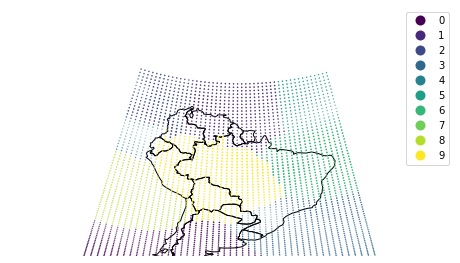

In [26]:
points['labels'] = list(map(str,(labels2)))
ax = gplt.polyplot(SA, projection=gcrs.AlbersEqualArea())

gplt.pointplot(
  points, projection=gcrs.AlbersEqualArea(), hue='labels', scale='meanV', limits=(1, 0.01), ax=ax, legend=True
)

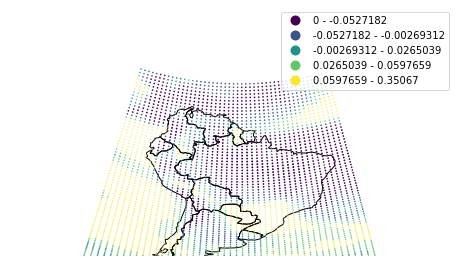

In [187]:
ax = gplt.polyplot(SA, projection=gcrs.AlbersEqualArea())
image = gplt.pointplot(
  points, projection=gcrs.AlbersEqualArea(), hue='meanV', scale='meanV', limits=(1, 0.1), ax=ax, legend=True
)

/N/u/yan30/Karst/.conda/envs/geoEnv/lib/python3.7/site-packages/geoplot/geoplot.py:231: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  f'Please specify "legend_var" explicitly when both "hue" and "scale" are '


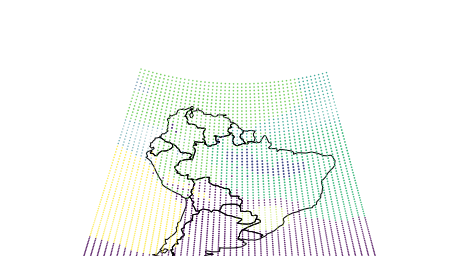

In [31]:
graph3 = geoKernelProd(points[['meanV']].to_numpy(),sparseGeo,0.2)
labels3 = spectral_clustering(graph3, n_clusters=10, eigen_solver='arpack')
points['labels3'] = list(map(str,(labels3)))
ax = gplt.polyplot(SA, projection=gcrs.AlbersEqualArea())

gplt.pointplot(
  points, projection=gcrs.AlbersEqualArea(), hue='labels3', scale='meanV', limits=(1, 0.01), ax=ax, legend=False
)

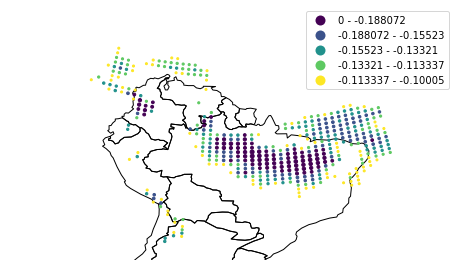

In [171]:
ax = gplt.polyplot(SA, projection=gcrs.AlbersEqualArea())
gplt.pointplot(
  wet, projection=gcrs.AlbersEqualArea(), hue='meanV', scale='meanV', limits=(4, 2), ax=ax, legend=True
)

/N/u/yan30/Karst/.conda/envs/geoEnv/lib/python3.7/site-packages/geoplot/geoplot.py:231: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  f'Please specify "legend_var" explicitly when both "hue" and "scale" are '


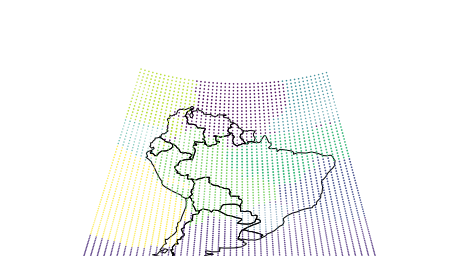

In [30]:
graph2 = geoKernelProd(points[['meanV']].to_numpy(),sparseGeo,0.45)
labels2 = spectral_clustering(graph2, n_clusters=10, eigen_solver='arpack')
points['labels2'] = list(map(str,(labels2)))
ax = gplt.polyplot(SA, projection=gcrs.AlbersEqualArea())

gplt.pointplot(
  points, projection=gcrs.AlbersEqualArea(), hue='labels2', scale='meanV', limits=(1, 0.01), ax=ax, legend=False
)

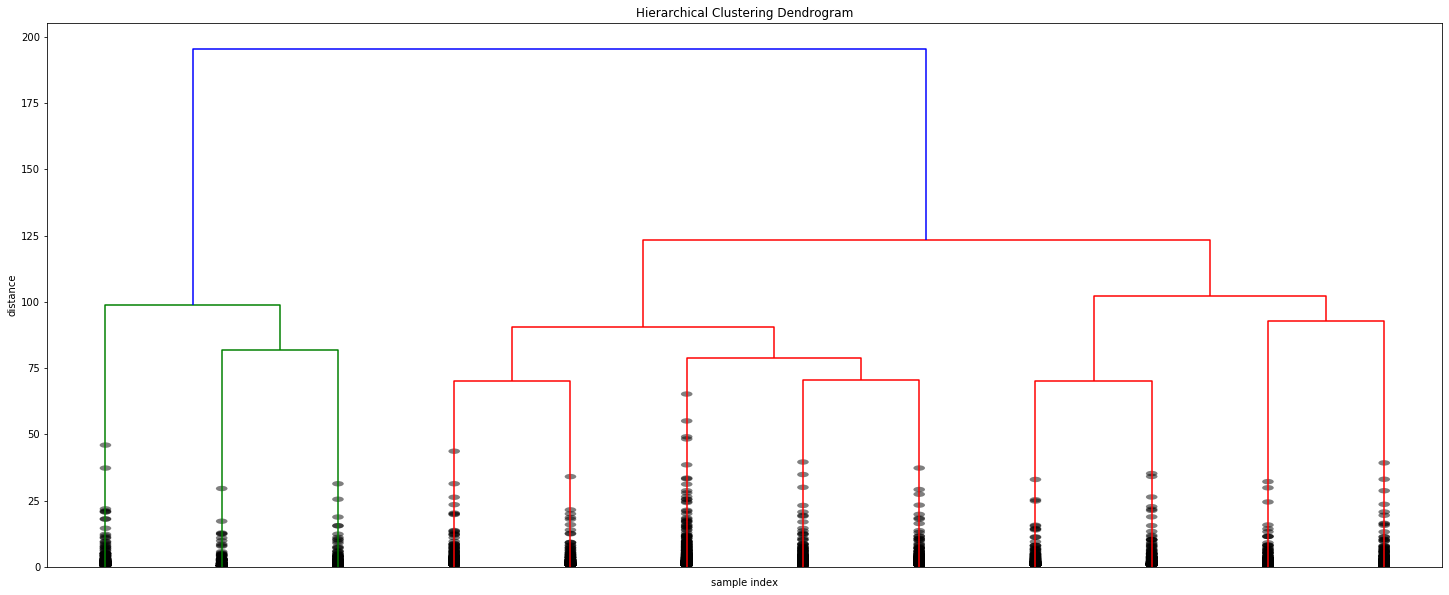

array([[2.00000000e+00, 3.00000000e+00, 2.49429710e-01, 2.00000000e+00],
       [4.50000000e+01, 4.60000000e+01, 2.58665200e-01, 2.00000000e+00],
       [4.30000000e+01, 4.40000000e+01, 2.67376604e-01, 2.00000000e+00],
       ...,
       [9.38900000e+03, 9.39400000e+03, 1.02083725e+02, 1.23200000e+03],
       [9.39300000e+03, 9.39600000e+03, 1.23188268e+02, 3.95600000e+03],
       [9.39500000e+03, 9.39700000e+03, 1.95366841e+02, 4.70000000e+03]])

In [228]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

graph0 = geoKernelProd(points[['meanV']].to_numpy(),sparseGeo,10)

listA = graph0.todense()
Z = linkage(listA, 'ward')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()
Z

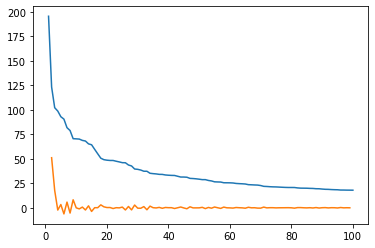

clusters: 2


In [232]:
last = Z[-100:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

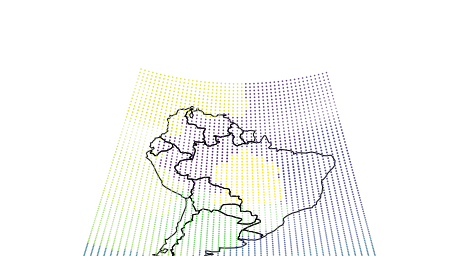

In [233]:
from scipy.cluster.hierarchy import fcluster
k=18
clusters = fcluster(Z, k, criterion='maxclust')
points['labels0'] = list(map(str,(clusters)))

ax = gplt.polyplot(SA, projection=gcrs.AlbersEqualArea())
gplt.pointplot(
  points, projection=gcrs.AlbersEqualArea(), hue='labels0', scale='meanV', limits=(1, 0.01), ax=ax, legend=False
)